In [9]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

C:\Users\y.eunseo\AppData\Local\Temp\ipykernel_9952\912229180.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [1]:
!pip install praat-parselmouth

     ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
     -- ------------------------------------- 0.5/8.9 MB 11.3 MB/s eta 0:00:01
     ---- ----------------------------------- 1.1/8.9 MB 11.5 MB/s eta 0:00:01
     ------- -------------------------------- 1.6/8.9 MB 11.7 MB/s eta 0:00:01
     --------- ------------------------------ 2.1/8.9 MB 11.1 MB/s eta 0:00:01
     ----------- ---------------------------- 2.6/8.9 MB 12.0 MB/s eta 0:00:01
     -------------- ------------------------- 3.2/8.9 MB 12.1 MB/s eta 0:00:01
     ---------------- ----------------------- 3.7/8.9 MB 11.7 MB/s eta 0:00:01
     ------------------ --------------------- 4.2/8.9 MB 11.8 MB/s eta 0:00:01
     --------------------- ------------------ 4.8/8.9 MB 11.9 MB/s eta 0:00:01
     ----------------------- ---------------- 5.3/8.9 MB 11.6 MB/s eta 0:00:01
     -------------------------- ------------- 5.8/8.9 MB 12.1 MB/s eta 0:00:01
     ---------------------------- ----------- 6.3/8.9 MB 11.

In [10]:
import glob
import parselmouth
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import parselmouth
from parselmouth.praat import call
import numpy as np

In [2]:
path = 'notebook.wav'

Object type: Sound
Object name: <no name>
Date: Mon Jan 29 16:53:31 2024

Number of channels: 2 (stereo)
Time domain:
   Start time: 0 seconds
   End time: 24.444979166666666 seconds
   Total duration: 24.444979166666666 seconds
Time sampling:
   Number of samples: 1173359
   Sampling period: 2.0833333333333333e-05 seconds
   Sampling frequency: 48000 Hz
   First sample centred at: 1.0416666666666666e-05 seconds
Amplitude:
   Minimum: -0.991577148 Pascal
   Maximum: 0.976196289 Pascal
   Mean: 7.36845544e-06 Pascal
   Root-mean-square: 0.115097473 Pascal
Total energy: 0.323833107 Pascal² sec (energy in air: 0.000809582767 Joule/m²)
Mean power (intensity) in air: 3.31185705e-05 Watt/m² = 75.2 dB
Standard deviation in channel 1: 0.115115701 Pascal
Standard deviation in channel 2: 0.11507934 Pascal



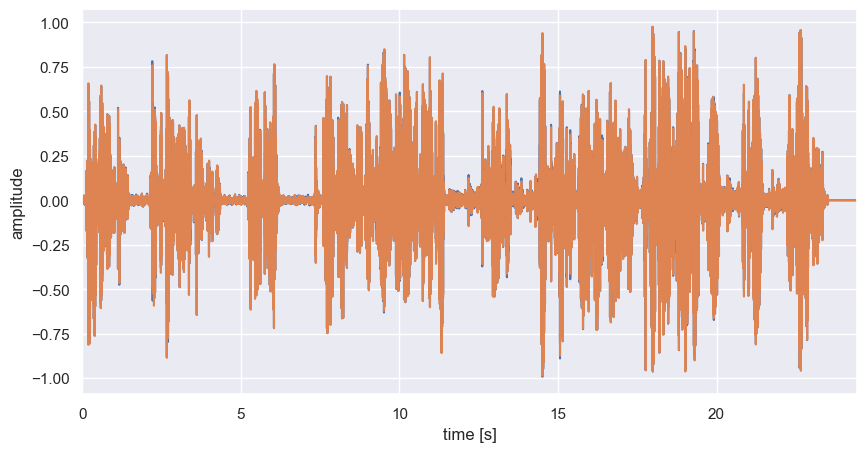

In [3]:
sns.set() # Use seaborn's default style to make attractive graphs

# Plot nice figures using Python's "standard" matplotlib library
snd = parselmouth.Sound(path)
print(snd)
plt.figure(figsize=(10,5))
plt.plot(snd.xs(), snd.values.T)
plt.xlim([snd.xmin, snd.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf")

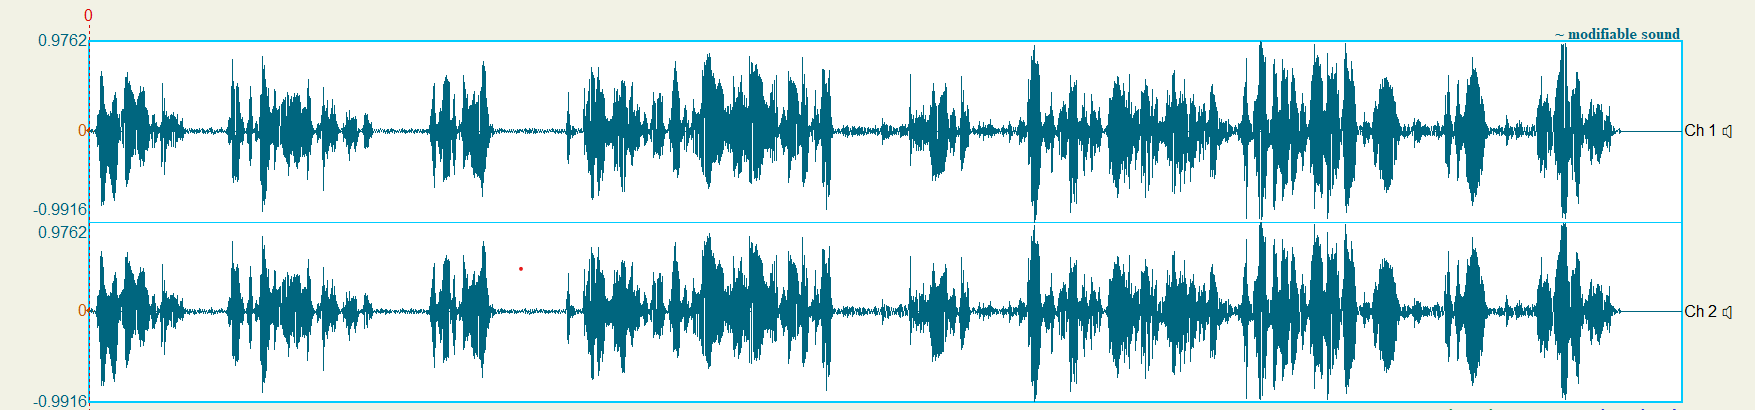

In [59]:
from IPython.display import Image

Image('amplitude_info_praat.png')

C:\Users\y.eunseo\AppData\Local\Temp\ipykernel_8096\1962125922.py:3: RuntimeWarning: divide by zero encountered in log10
  sg_db = 10 * np.log10(spectrogram.values)


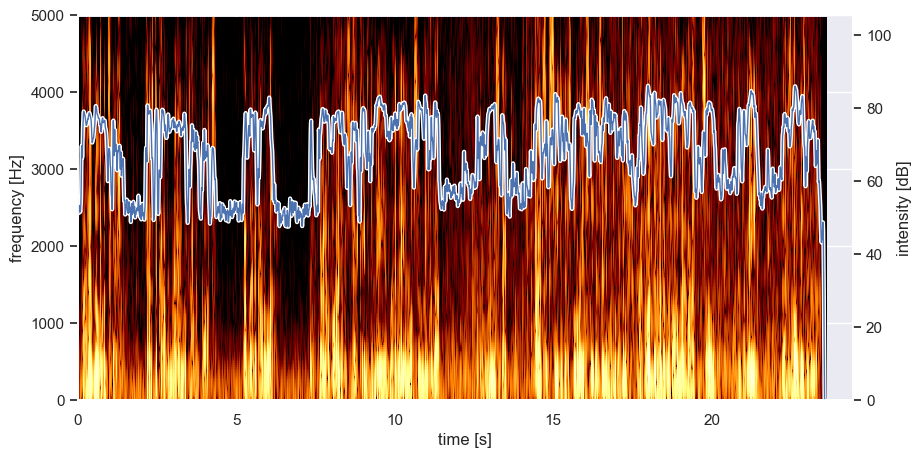

In [4]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")

intensity = snd.to_intensity()
spectrogram = snd.to_spectrogram()
plt.figure(figsize=(10,5))
draw_spectrogram(spectrogram)
plt.twinx()
draw_intensity(intensity)
plt.xlim([snd.xmin, snd.xmax])
plt.show() 

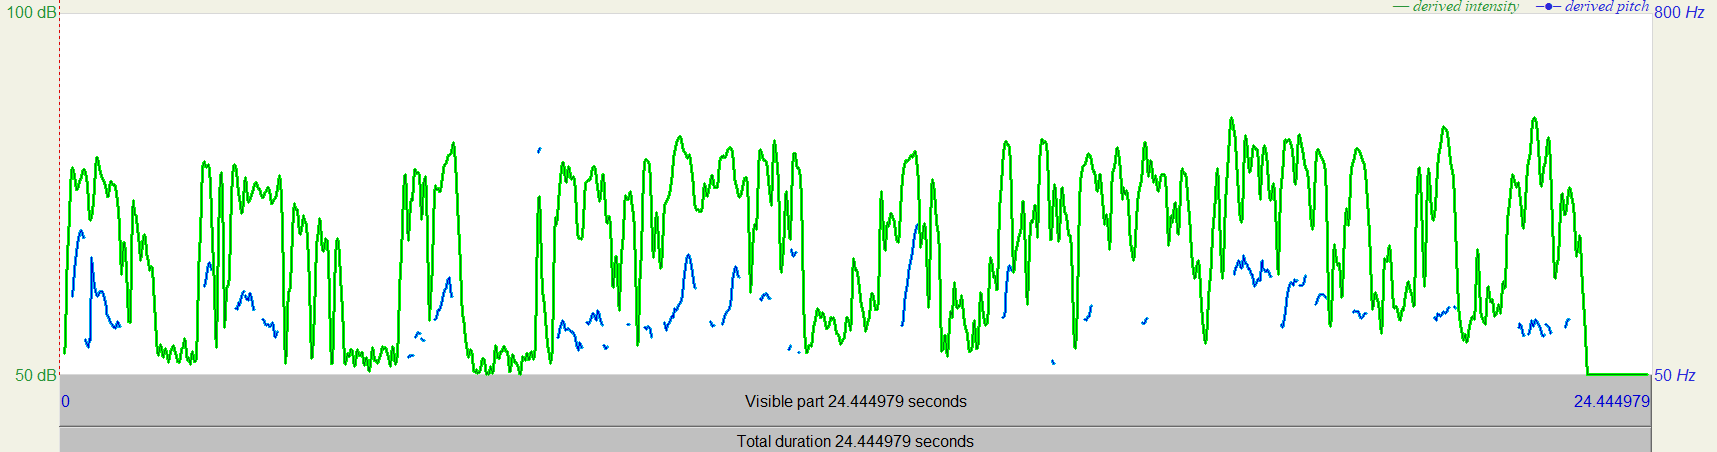

In [60]:
Image('pitchdb_info_praat.png')

C:\Users\y.eunseo\AppData\Local\Temp\ipykernel_8096\1962125922.py:3: RuntimeWarning: divide by zero encountered in log10
  sg_db = 10 * np.log10(spectrogram.values)


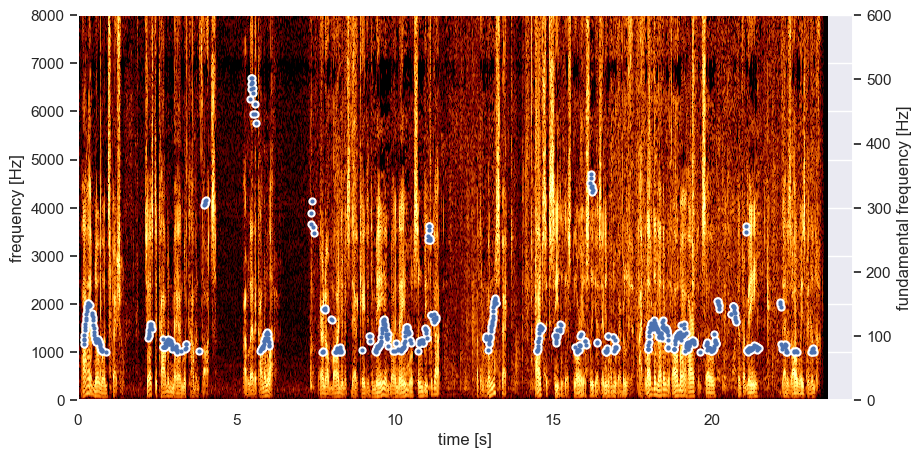

In [7]:
def draw_pitch(pitch):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")

pitch = snd.to_pitch()
pre_emphasized_snd = snd.copy()
pre_emphasized_snd.pre_emphasize()
spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
plt.figure(figsize=(10,5))
draw_spectrogram(spectrogram)
plt.twinx()
draw_pitch(pitch)
plt.xlim([snd.xmin, snd.xmax])
plt.show() # or plt.savefig("spectrogram_0.03.pdf")

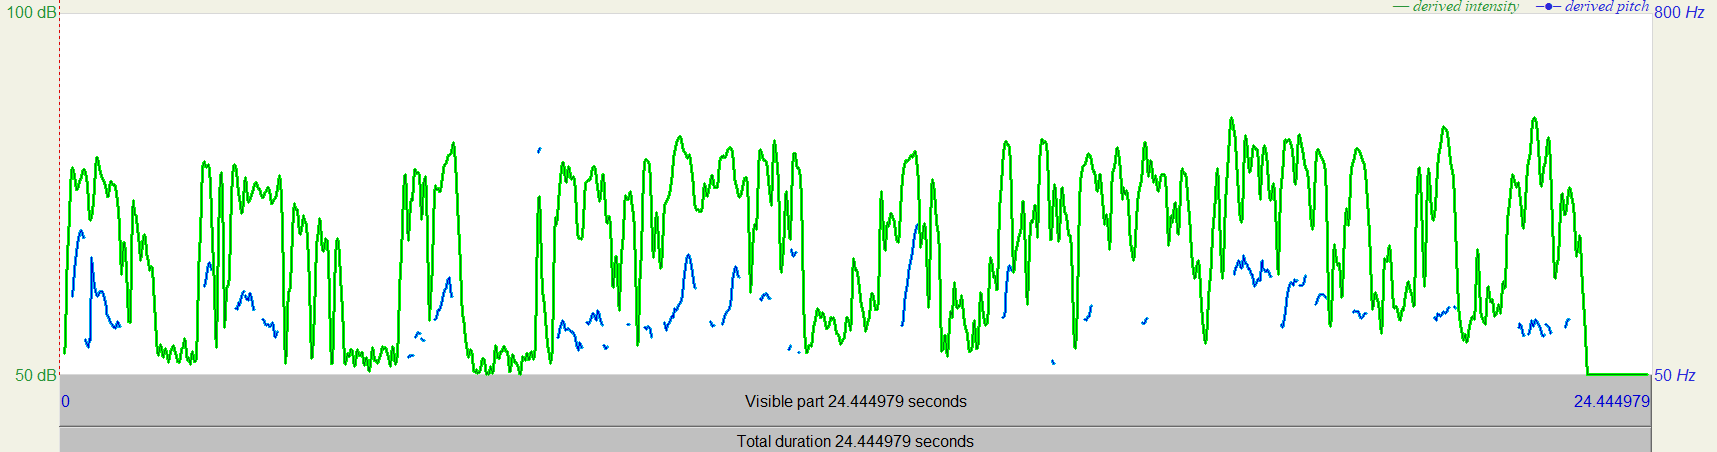

In [61]:
Image('pitchdb_info_praat.png')

## TRY 1

In [18]:
formants_value = ['F1','F2',"F3","F4","F5"]


# 음원파일을 사용하려면, 음원파일을 Sound객체로 변환해야 한다.
Sound = parselmouth.Sound(path)

# Formant값을 추출하려면, Sound 객체에 to_formant_burg 함수를 사용한다. 
# time_step 변수로 formant 추출 시간단위를 지정할 수 있다.
formant = Sound.to_formant_burg(time_step = 0.1)

# Pitch값을 추출하려면 to_pitch 함수를 사용한다.
# 추출 방식에 따라 to_pitch_ac, to_pitch_cc 등 여러 함수가 지원된다. Docs의 API Reference에서 원하는 함수를 찾아 사용하면 됨.
pitch = Sound.to_pitch()

# formant 추출에 사용된 시간은 ts() 함수로 얻을 수 있다.
df = pd.DataFrame({"times":formant.ts()})

for idx, col in enumerate(formants_value, 1):
    # 각 시간대별 F1 ~ F5를 얻기 위한 함수.
    # F1 ~ F5라는 각각의 String 값을 formant_number 인자로 전달해야 한다.
    df[col] = df['times'].map(lambda x: formant.get_value_at_time(formant_number = idx, time = x))

# F0는 Formant 객체가 아니라 Pitch 객체에서 얻을 수 있다.
df['F0(pitch)'] = df['times'].map(lambda x: pitch.get_value_at_time(time = x))
df


,times,F1,F2,F3,F4,F5,F0(pitch)
0,0.07249,838.850577,2279.469889,3409.602003,4268.771367,NaN,NaN
1,0.17249,675.849784,1173.170677,2420.197303,3700.338458,4185.077788,NaN
2,0.27249,585.915618,1427.414045,2319.502542,3787.978993,4596.611628,133.879575
3,0.37249,486.221994,1621.717035,2507.674114,3675.932861,4499.348823,148.056021
4,0.47249,249.676950,1744.745808,2399.534895,3978.289128,5001.012742,129.203869
...,...,...,...,...,...,...,...
239,23.97249,1499.000022,2525.036911,5437.952361,NaN,NaN,NaN
240,24.07249,1499.007203,2524.247614,5437.964401,NaN,NaN,NaN
241,24.17249,1499.013004,2523.366745,5437.978234,NaN,NaN,NaN
242,24.27249,1499.018444,2522.403715,5437.995195,NaN,NaN,NaN


In [34]:
sound = parselmouth.Sound("notebook.wav")

total_duration = sound.get_total_duration()
print("Total duration:",total_duration)

pitch_list = []
intensity_list = []
count = 1
for start_time in range(0, 24, 5):
    end_time = min(start_time + 5, total_duration)

    print(f"Segment start time: {start_time:.2f}, end time: {end_time:.2f} ")
    segment = sound.extract_part(from_time=start_time, to_time=end_time)
    segment.save(f'{count}.wav','WAV')
    count = count + 1
    
    

Total duration: 24.444979166666666
Segment start time: 0.00, end time: 5.00 
Segment start time: 5.00, end time: 10.00 
Segment start time: 10.00, end time: 15.00 
Segment start time: 15.00, end time: 20.00 
Segment start time: 20.00, end time: 24.44 


In [25]:
import parselmouth
from parselmouth.praat import call
import numpy as np

def calculate_pitch_intensity(wav_file, segment_duration=5):
    sound = parselmouth.Sound(wav_file)

    total_duration = sound.get_total_duration()
    print("Total duration:",total_duration)

    pitch_list = []
    intensity_list = []

    for start_time in range(0, int(total_duration), segment_duration):
        end_time = min(start_time + segment_duration, total_duration)
        
        print(f"Segment start time: {start_time:.2f}, end time: {end_time:.2f} ")
        segment = sound.extract_part(from_time=start_time, to_time=end_time)

        pitch = call(segment, 'To Pitch', 0.0, 75.0, 600.0)
        intensity = call(sound, 'To Intensity', 75.0, 0.0, True)
        
        mean_pitch = call(pitch, "Get mean", 0, 0, "Hertz")
        intensity = call(segment, "To Intensity", 75.0, 0.0, True)
        mean_intensity = call(intensity, "Get mean", 0, 0)
            
        pitch_list.append(mean_pitch)
        intensity_list.append(mean_intensity)

    return pitch_list, intensity_list

wav_file_path = "notebook.wav"
pitch_values, intensity_values = calculate_pitch_intensity(wav_file_path)

for i, (pitch, intensity) in enumerate(zip(pitch_values, intensity_values)):
    print(f"Segment {i + 1}: Pitch = {pitch:.2f} Hz, Intensity = {intensity:.2f} dB")


Total duration: 24.444979166666666
Segment start time: 0.00, end time: 5.00 
Segment start time: 5.00, end time: 10.00 
Segment start time: 10.00, end time: 15.00 
Segment start time: 15.00, end time: 20.00 
Segment start time: 20.00, end time: 24.44 
Segment 1: Pitch = 107.84 Hz, Intensity = 65.23 dB
Segment 2: Pitch = 147.27 Hz, Intensity = 66.90 dB
Segment 3: Pitch = 116.52 Hz, Intensity = 67.07 dB
Segment 4: Pitch = 105.93 Hz, Intensity = 73.90 dB
Segment 5: Pitch = 101.53 Hz, Intensity = 4.14 dB


In [24]:
mean_pitch = call(pitch, "Get mean", 0, 0, "Hertz")
print(mean_pitch)

median_pitch = call(pitch, "Get quantile", 0, 0, 0.5, "Hertz")
print(median_pitch)

min_pitch = call(pitch, "Get minimum", 0, 0, "Hertz", "Parabolic")
print(min_pitch)

max_pitch = call(pitch, "Get maximum", 0, 0, "Hertz", "Parabolic")
print(max_pitch)

standard_deviation_pitch = call(pitch, "Get standard deviation", 0, 0, "Hertz")
print(standard_deviation_pitch)

82.63582999313593
75.26276516047875
50.06152406252853
153.85849265849131
24.53581772992068


## TRY 2

In [68]:
import os
import pandas as pd
from config import Config
import glob
from sklearn.preprocessing import minmax_scale
import sys

import parselmouth
from parselmouth.praat import call
import numpy as np


def extract_features(fn):

    output_df = pd.DataFrame(columns=['Min Pitch', 'Max Pitch', 'Mean Pitch', 'Sd Pitch', 
                                    'Min Intensity', 'Max Intensity', 'Mean Intensity', 'Sd Intensity', 'Energy'])
    ipu_df = pd.DataFrame(columns=['start_time', 'end_time'])

    sound = parselmouth.Sound(fn)
    pitch = call(sound, 'To Pitch', 0.0, 75.0, 600.0)
    intensity = call(sound, 'To Intensity', 75.0, 0.0, True)
    silence = call(sound, "To TextGrid (silences)", 100, 0.0, -20.0, 1.0, 0.1, "silent", "sounding")

    num_intervals = call(silence, "Get number of intervals",1)
    start_times = []
    end_times = []
    for i in range(1, num_intervals+1):
        label = call(silence, "Get label of interval", 1, i)
        if label == "sounding":
            start_times.append(call(silence, "Get start time of interval",1,  i))
            end_times.append(call(silence, "Get end time of interval", 1, i))
    
    new_data = pd.DataFrame({'start_time': [start_times],'end_time': [end_times]})
    new_data_expanded = new_data.apply(lambda col: col.apply(pd.Series).stack()).reset_index(drop=True)
    ipu_df = pd.concat([ipu_df, new_data_expanded], ignore_index=True)
                               
    min_pitches = []
    max_pitches = []
    mean_pitches = []
    sd_pitches = []

    min_intensities = []
    max_intensities = []
    mean_intensities = []
    sd_intensities = []   
    energy_list = []

    for t1, t2 in zip(start_times, end_times):
        # pitch
        min_pitch = call(pitch, 'Get minimum', t1, t2, 'Hertz', 'Parabolic')
        max_pitch = call(pitch, 'Get maximum', t1, t2, 'Hertz', 'Parabolic')
        mean_pitch = call(pitch, 'Get mean',t1, t2, 'Hertz')
        sd_pitch = call(pitch, 'Get standard deviation', t1, t2, 'Hertz')

        min_pitches.append(min_pitch)
        max_pitches.append(max_pitch)
        mean_pitches.append(mean_pitch)
        sd_pitches.append(sd_pitch)

        # intensity
        min_intensity = call(intensity, 'Get minimum', t1, t2, 'Parabolic')
        max_intensity = call(intensity, 'Get maximum', t1, t2, 'Parabolic')
        mean_intensity = call(intensity, 'Get mean', t1, t2, 'energy')
        sd_intensity = call(intensity, 'Get standard deviation', t1, t2)

        min_intensities.append(min_intensity)
        max_intensities.append(max_intensity)
        mean_intensities.append(mean_intensity)
        sd_intensities.append(sd_intensity)

        # Energy
        energy = call(sound, 'Get energy', t1, t2)
        energy_list.append(energy)

        new_data2 = pd.DataFrame({'Min Pitch': [min_pitch],'Max Pitch': [max_pitch],'Mean Pitch': [mean_pitch],'Sd Pitch': [sd_pitch],
                                 'Min Intensity': [min_intensity],'Max Intensity': [max_intensity],'Mean Intensity': [mean_pitch],
                                 'Sd Intensity': [sd_intensity],'Energy': [energy]})
        new_data_expanded2 = new_data2.apply(lambda col: col.apply(pd.Series).stack()).reset_index(drop=True)
        output_df = pd.concat([output_df, new_data_expanded2], ignore_index=True)
    
    output_df.to_csv("20240102-output_df.csv", index=None, header=True)
    ipu_df.to_csv("20240102-ipu_df.csv", index=None, header=True)
    return output_df, ipu_df



myargs = "notebook.wav"
df, ipu_df = extract_features(myargs)

## TRY 3. 가장 빠르게 pitch, intensity 구하는 방법 (Praat 결과와 동일)

In [29]:
def measurePitch(wav_file, f0min, f0max, unit):
    sound = parselmouth.Sound(wav_file)
    pitch = call(sound, "To Pitch", 0.0, f0min, f0max) 
    meanF0 = call(pitch, "Get mean", 0, 0, unit) 
    stdevF0 = call(pitch, "Get standard deviation", 0 ,0, unit) 
    return meanF0, stdevF0

def measureIntensity(wav_file):
    sound = parselmouth.Sound(wav_file)
    intensity = call(sound, 'To Intensity', 75.0, 0.0, True)
    mean_intensity = call(intensity, "Get mean", 0, 0)
    return mean_intensity

def calculate_pitch_intensity(wav_file, segment_duration=5):
    sound = parselmouth.Sound(wav_file)

    total_duration = sound.get_total_duration()
    print("Total duration:",total_duration)

    pitch_list = []
    intensity_list = []

    for start_time in range(0, int(total_duration), segment_duration):
        end_time = min(start_time + segment_duration, total_duration)
        
        print(f"Segment start time: {start_time:.2f}, end time: {end_time:.2f} ")
        segment = sound.extract_part(from_time=start_time, to_time=end_time)

        (meanF0, stdevF0) = measurePitch(segment, 50, 800, "Hertz")
        (mean_intensity) = measureIntensity(segment)
            
        pitch_list.append(meanF0)
        intensity_list.append(mean_intensity)

    return pitch_list, intensity_list


wav_file_path = "notebook.wav"
pitch_values, intensity_values = calculate_pitch_intensity(wav_file_path)
for i, (pitch, intensity) in enumerate(zip(pitch_values, intensity_values)):
    print(f"Segment {i + 1}: Pitch = {pitch:.2f} Hz, Intensity = {intensity:.2f} dB")


Total duration: 24.444979166666666
Segment start time: 0.00, end time: 5.00 
Segment start time: 5.00, end time: 10.00 
Segment start time: 10.00, end time: 15.00 
Segment start time: 15.00, end time: 20.00 
Segment start time: 20.00, end time: 24.44 
Segment 1: Pitch = 94.91 Hz, Intensity = 65.23 dB
Segment 2: Pitch = 82.45 Hz, Intensity = 66.90 dB
Segment 3: Pitch = 107.24 Hz, Intensity = 67.07 dB
Segment 4: Pitch = 97.32 Hz, Intensity = 73.90 dB
Segment 5: Pitch = 82.81 Hz, Intensity = 4.14 dB


## Pitch (F0), Volume (Intensity), Speed (using word count), Filler words count, pause
### wav file로 확인

In [13]:
from pydub import AudioSegment
import speech_recognition as sr
import librosa
import numpy as np
from decimal import Decimal, ROUND_HALF_UP
from scipy.fftpack import fft, ifft
from scipy.signal import find_peaks

C:\Users\y.eunseo\AppData\Local\anaconda3\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [9]:
sr.__version__

'3.10.1'

In [8]:
r = sr.Recognizer()
harvard = sr.AudioFile('notebook.wav')
with harvard as source:
    audio = r.record(source)
r.recognize_google(audio)

In [41]:
def measurePitch(wav_file, f0min, f0max, unit):
    sound = parselmouth.Sound(wav_file)
    pitch = call(sound, "To Pitch", 0.0, f0min, f0max) 
    meanF0 = call(pitch, "Get mean", 0, 0, unit) 
    stdevF0 = call(pitch, "Get standard deviation", 0 ,0, unit) 
    return meanF0, stdevF0

def measureIntensity(wav_file, minPitch, timeStep, dB):
    sound = parselmouth.Sound(wav_file)
    intensity = call(sound, 'To Intensity', minPitch, timeStep, dB)
    mean_intensity = call(intensity, "Get mean", 0, 0)
    return mean_intensity

def count_fillers(text, filler_words):
    return sum(text.lower().count(word) for word in filler_words)

def calculate_pitch_intensity(wav_file):
    pitch_list = []; intensity_list = []
    
    sound = parselmouth.Sound(wav_file)
    (meanF0, stdevF0) = measurePitch(sound, 50, 800, "Hertz")
    (mean_intensity) = measureIntensity(sound,75.0, 0.0, True)
    
    pitch_list.append(meanF0)
    intensity_list.append(mean_intensity)
    return pitch_list, intensity_list

def analyze_audio(audio_file_path, interval):
    recognizer = sr.Recognizer()
    audio = AudioSegment.from_file(audio_file_path)
    audio_duration = audio.duration_seconds
    print("Detailed Information...")
    print(f"Duration: {audio_duration} seconds")
    print(f"Channels: {audio.channels}")
    print(f"Frame rate: {audio.frame_rate}\n\n")

    start_time = 0
    filler_words_count = 0; pause_count = 0
    turn = 0; turn_list = []
    
    while start_time < len(audio):
        turn += 1
        end_time = min((start_time + interval), len(audio))
        print(f"\n[start_time:{start_time}, end_time: {end_time}, total_time:{len(audio)}]")

        segment = audio[start_time:end_time]
        start_time = end_time
        
        temp_file_path = f"./temp_audio{turn}.wav"
        segment.export(temp_file_path, format = "wav")
        pitch_values, intensity_values = calculate_pitch_intensity(wav_file_path)
        print(f"Pitch = {pitch:.2f} Hz, Intensity = {intensity:.2f} dB")
                
        try:   
            with sr.AudioFile(temp_file_path) as source:
                segment_audio = recognizer.record(source)
                segment_text = recognizer.recognize_google(segment_audio)

            # Filler words 계산
            filler_words_count += count_fillers(segment_text, filler_words)
            if (filler_words_count >= 5):
                print("Too much filler words!")
                filler_words_count = 0

            # 단어 또는 음절 수(모음 수를 계산하여 근사치) 계산
            words = len(segment_text.split())
            print("Segment_text.split():",segment_text.split())
            syllables = sum(1 for char in segment_text if char.lower() in 'aeiou')

            # 발화 속도 계산 (단어 당, 만약 분당 계산할 것이라면 * 60 해주기)
            speech_rate_words_per_minute = round((words / segment.duration_seconds),2)
            print("speech_segment_duration:",segment.duration_seconds,"seconds")

            # 발화 속도 계산 (음절 당)
            speech_rate_syllables_per_minute = round((syllables / segment.duration_seconds),2)

            print(f"Speech Rate (Words/Second): {speech_rate_words_per_minute}")
            print(f"Speech Rate (Syllables/Second): {speech_rate_syllables_per_minute}")

        except sr.UnknownValueError:
            print("No speech recognized in the current segment.")
        except sr.RequestError as e:
            print(f"Error connecting to Google Speech Recognition service: {e}")
        except Exception as e:
            print(f"An error occurred: {e}")

    print("\nFinished...")
    
    
if __name__ == "__main__":
    
    filler_words = ["Um","Uh","Like","You know","Well"]
    wav_file_path = "notebook.wav"
    analyze_audio(wav_file_path, interval = 3000)
    
        
    


Detailed Information...
Duration: 24.444979166666666 seconds
Channels: 2
Frame rate: 48000



[start_time:0, end_time: 3000, total_time:24445]
Pitch = 92.44 Hz, Intensity = 56.82 dB
Segment_text.split(): ['I', 'have', 'no', 'one', 'special', 'just']
speech_segment_duration: 3.0 seconds
Speech Rate (Words/Second): 2.0
Speech Rate (Syllables/Second): 3.33

[start_time:3000, end_time: 6000, total_time:24445]
Pitch = 92.44 Hz, Intensity = 56.82 dB
Segment_text.split(): ['man', 'with', 'common', 'thoughts', 'of', 'Atlanta']
speech_segment_duration: 3.0 seconds
Speech Rate (Words/Second): 2.0
Speech Rate (Syllables/Second): 3.33

[start_time:6000, end_time: 9000, total_time:24445]
Pitch = 92.44 Hz, Intensity = 56.82 dB
Segment_text.split(): ['there', 'are', 'no', 'monuments']
speech_segment_duration: 3.0 seconds
Speech Rate (Words/Second): 1.33
Speech Rate (Syllables/Second): 2.67

[start_time:9000, end_time: 12000, total_time:24445]
Pitch = 92.44 Hz, Intensity = 56.82 dB
Segment_text.split(

In [6]:
def measurePitch(wav_file, f0min, f0max, unit):
    sound = parselmouth.Sound(wav_file)
    pitch = call(sound, "To Pitch", 0.0, f0min, f0max) 
    meanF0 = call(pitch, "Get mean", 0, 0, unit) 
    stdevF0 = call(pitch, "Get standard deviation", 0 ,0, unit) 
    return meanF0, stdevF0

def measureIntensity(wav_file, minPitch, timeStep, dB):
    sound = parselmouth.Sound(wav_file)
    intensity = call(sound, 'To Intensity', minPitch, timeStep, dB)
    mean_intensity = call(intensity, "Get mean", 0, 0)
    return mean_intensity

def calculate_pitch_intensity(wav_file):
    sound = parselmouth.Sound(wav_file)
    (meanF0, stdevF0) = measurePitch(sound, 50, 800, "Hertz")
    (mean_intensity) = measureIntensity(sound,75.0, 0.0, True)

    return meanF0, mean_intensity

def calculate_speed(segment_text, segment):
    # 단어 또는 음절 수(모음 수를 계산하여 근사치) 계산
    words = len(segment_text.split())
    print("Segment_text.split():",segment_text.split())
    syllables = sum(1 for char in segment_text if char.lower() in 'aeiou')

    # 발화 속도 계산 (단어 당, 만약 분당 계산할 것이라면 * 60 해주기)
    speech_rate_words_per_minute = round((words / segment.duration_seconds),2)
    print("speech_segment_duration:",segment.duration_seconds,"seconds")

    # 발화 속도 계산 (음절 당)
    speech_rate_syllables_per_minute = round((syllables / segment.duration_seconds),2)
    return speech_rate_words_per_minute, speech_rate_syllables_per_minute

def count_fillers(text, filler_words):
    return sum(text.lower().count(word) for word in filler_words)

def analyze_audio(audio_file_path, interval):
    recognizer = sr.Recognizer()
    audio = AudioSegment.from_file(audio_file_path)
    audio_duration = audio.duration_seconds
    print("Detailed Information...")
    print(f"Duration: {audio_duration} seconds")
    print(f"Channels: {audio.channels}")
    print(f"Frame rate: {audio.frame_rate}\n\n")

    start_time = 0
    filler_words_count = 0; pause_count = 0
    turn = 0; turn_list = []
    
    while start_time < len(audio):
        turn += 1
        end_time = min((start_time + interval), len(audio))
        print(f"\n[start_time:{start_time}, end_time: {end_time}, total_time:{len(audio)}]")
        
        if (start_time != 0):
            start_time = start_time - 1
        segment = audio[start_time:end_time]
        start_time = end_time
        
        temp_file_path = f"./temp_audio{turn}.wav"
        segment.export(temp_file_path, format = "wav")
        pitch_values, intensity_values = calculate_pitch_intensity(wav_file_path)
        print(f"Pitch = {pitch_values:.2f} Hz, Intensity = {intensity_values:.2f} dB")
                
        try:   
            with sr.AudioFile(temp_file_path) as source:
                segment_audio = recognizer.record(source)
                segment_text = recognizer.recognize_google(segment_audio)
                
            (speech_rate_words_per_minute, speech_rate_syllables_per_minute) = calculate_speed(segment_text, segment)
            print(f"Speech Rate (Words/Second): {speech_rate_words_per_minute}")
            print(f"Speech Rate (Syllables/Second): {speech_rate_syllables_per_minute}")
            
            # Filler words 계산
            filler_words_count += count_fillers(segment_text, filler_words)
            if (filler_words_count >= 5):
                print("Too much filler words!")
                filler_words_count = 0

        except sr.UnknownValueError:
            print("No speech recognized in the current segment.")
        except sr.RequestError as e:
            print(f"Error connecting to Google Speech Recognition service: {e}")
        except Exception as e:
            print(f"An error occurred: {e}")

    print("\nFINISHED...")
    
    
if __name__ == "__main__":
    
    filler_words = ["Um","Uh","Like","You know","Well"]
    wav_file_path = "notebook.wav"
    analyze_audio(wav_file_path, interval = 3000)
    
        
    


Detailed Information...
Duration: 24.444979166666666 seconds
Channels: 2
Frame rate: 48000



[start_time:0, end_time: 3000, total_time:24445]
Pitch = 92.44 Hz, Intensity = 56.82 dB
Segment_text.split(): ['I', 'have', 'no', 'one', 'special', 'just']
speech_segment_duration: 3.0 seconds
Speech Rate (Words/Second): 2.0
Speech Rate (Syllables/Second): 3.33

[start_time:3000, end_time: 6000, total_time:24445]
Pitch = 92.44 Hz, Intensity = 56.82 dB
Segment_text.split(): ['man', 'with', 'common', 'thoughts', 'of', 'Atlanta']
speech_segment_duration: 3.001 seconds
Speech Rate (Words/Second): 2.0
Speech Rate (Syllables/Second): 3.33

[start_time:6000, end_time: 9000, total_time:24445]
Pitch = 92.44 Hz, Intensity = 56.82 dB
Segment_text.split(): ['there', 'are', 'no', 'monuments']
speech_segment_duration: 3.001 seconds
Speech Rate (Words/Second): 1.33
Speech Rate (Syllables/Second): 2.67

[start_time:9000, end_time: 12000, total_time:24445]
Pitch = 92.44 Hz, Intensity = 56.82 dB
Segment_text.sp

## Final Code 

In [7]:
!pip install pyaudio
!pip install praat-parselmouth

  Obtaining dependency information for pyaudio from https://files.pythonhosted.org/packages/82/d8/f043c854aad450a76e476b0cf9cda1956419e1dacf1062eb9df3c0055abe/PyAudio-0.2.14-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/164.1 kB ? eta -:--:--
   --------------------------------------- 164.1/164.1 kB 10.3 MB/s eta 0:00:00


In [11]:
import os
import pandas as pd
from config import Config
import glob
from sklearn.preprocessing import minmax_scale
import sys

import parselmouth
from parselmouth.praat import call
import numpy as np

from pydub import AudioSegment
import speech_recognition as sr
import librosa
import numpy as np
from decimal import Decimal, ROUND_HALF_UP
from scipy.fftpack import fft, ifft
from scipy.signal import find_peaks

In [14]:
import random
import time
import parselmouth
import pyaudio
import speech_recognition as sr

def measurePitch(wav_file, f0min, f0max, unit):
    sound = parselmouth.Sound(wav_file)
    pitch = call(sound, "To Pitch", 0.0, f0min, f0max) 
    meanF0 = call(pitch, "Get mean", 0, 0, unit) 
    stdevF0 = call(pitch, "Get standard deviation", 0 ,0, unit) 
    return meanF0, stdevF0

def measureIntensity(wav_file, minPitch, timeStep, dB):
    sound = parselmouth.Sound(wav_file)
    intensity = call(sound, 'To Intensity', minPitch, timeStep, dB)
    mean_intensity = call(intensity, "Get mean", 0, 0)
    return mean_intensity

def calculate_pitch_intensity(wav_file):
    sound = parselmouth.Sound(wav_file)
    (meanF0, stdevF0) = measurePitch(sound, 100, 800, "Hertz")
    (mean_intensity) = measureIntensity(sound,75.0, 0.0, True)
    return meanF0, mean_intensity

def calculate_speed(text, time):
    if text is not None:
        words = len(text.split())
        syllables = sum(1 for char in text if char.lower() in 'aeiou')
        speech_rate_words_per_second = round((words / time) * 60, 2)
        speech_rate_syllables_per_second = round((syllables / time) * 60, 2)
        return speech_rate_words_per_second, speech_rate_syllables_per_second

    else:
        return False, False 

def count_fillers(text, filler_words, threshold=5):
    if text is not None:
        lowercase_text = text.lower()
        return sum(lowercase_text.count(word) for word in filler_words)
    else:
        return 0

def recognize_speech_from_mic(recognizer, microphone, audio_file_path="./temp.wav"):
    
    if not isinstance(recognizer, sr.Recognizer):
        raise TypeError("`recognizer` must be `Recognizer` instance")
    if not isinstance(microphone, sr.Microphone):
        raise TypeError("`microphone` must be `Microphone` instance")
    with microphone as source:
        recognizer.adjust_for_ambient_noise(source)
        audio = recognizer.listen(source)
        
        with open(audio_file_path, "wb") as f:
            f.write(audio.get_wav_data())

    response = {
        "success": True,
        "error": None,
        "transcription": None
    }
    try:
        response["transcription"] = recognizer.recognize_google(audio)
    except sr.RequestError:
        response["success"] = False
        response["error"] = "API unavailable"
    except sr.UnknownValueError:
        response["error"] = "Unable to recognize speech"
    return response, audio_file_path

if __name__ == "__main__":
    
    count = 1
    filler_words = ["like", "um", "uh", "you know","well"]
    
    recognizer = sr.Recognizer()
    microphone = sr.Microphone()
    
    instructions = ("대본을 말해보세요:")
    print(instructions)

    try:
        while True:
            start_time = time.time()
            count = count + 1
            
            guess, audio_file_path = recognize_speech_from_mic(recognizer, microphone)

            if guess["success"]:
                print("대본: {}".format(guess["transcription"]))

                end_time = time.time() - start_time
                print("소요 시간: {} 초".format(end_time))

                filler_words_count = count_fillers(guess["transcription"], filler_words)
                if filler_words_count >= 5:
                    print("Too much filler words!")

                speech_rate_words_per_minute, speech_rate_syllables_per_minute = calculate_speed(guess["transcription"], end_time)
                if speech_rate_words_per_minute is not False:
                    print(f"Speech Rate (Words/Minute): {speech_rate_words_per_minute:.2f}")
                    print(f"Speech Rate (Syllables/Minute): {speech_rate_syllables_per_minute:.2f}")
                else:
                    print("No input text.")
                    
                audio = AudioSegment.from_file(audio_file_path)
                audio_duration = audio.duration_seconds
                print("Audio_duration for temp.wav:",audio_duration)
                pitch_values, intensity_values = calculate_pitch_intensity(audio_file_path)
                print(f"Pitch = {pitch_values:.2f} Hz, Intensity = {intensity_values:.2f} dB\n\n")
  
            else:
                print("오류: {}".format(guess["error"]))

    except KeyboardInterrupt:
        print("\n프로그램을 종료합니다.")

    

대본을 말해보세요:
대본: the design thinking process is a creative and Innovative problem solving methodology
소요 시간: 10.52973198890686 초
Speech Rate (Words/Minute): 68.38
Speech Rate (Syllables/Minute): 153.85
Audio_duration for temp.wav: 6.8034467120181406
Pitch = 300.51 Hz, Intensity = 72.03 dB


대본: to Define an address problems through a series of steps
소요 시간: 8.96992015838623 초
Speech Rate (Words/Minute): 66.89
Speech Rate (Syllables/Minute): 113.71
Audio_duration for temp.wav: 4.96907029478458
Pitch = 332.61 Hz, Intensity = 72.40 dB


대본: increase vert
소요 시간: 3.1625101566314697 초
Speech Rate (Words/Minute): 37.94
Speech Rate (Syllables/Minute): 94.86
Audio_duration for temp.wav: 1.0448979591836736
Pitch = 404.95 Hz, Intensity = 73.14 dB


대본: hello hello hello hello
소요 시간: 11.750455141067505 초
Speech Rate (Words/Minute): 20.42
Speech Rate (Syllables/Minute): 40.85
Audio_duration for temp.wav: 4.2260317460317465
Pitch = 277.23 Hz, Intensity = 69.45 dB


대본: None
소요 시간: 3.282188653945923 초
N

I have no one special just 
['I', 'have', 'no', 'one', 'special', 'just']

a common man with common thoughts of Atlanta
['man', 'with', 'common', 'thoughts', 'of', 'Atlanta']

there are no monuments 
['there', 'are', 'no', 'monuments']

dedicated to me and my name will soon be forgot 
['read', 'it', 'to', 'me', 'and', 'my', 'name', 'will', 'soon', 'be', 'forgot']

but I don't want to respect
['I', "didn't", 'want', 'to', 'respect']

I have succeeded as gloriously as anyone who ever lived 
['does', 'gloriously', 'as', 'anyone', 'who', 'ever', 'lived']

I've Loved another with all my heart and soul 
['add', 'another', 'with', 'all', 'my', 'heart', 'and', 'soul']

and for me that is always been enough
['tell', 'me', 'that', 'is', 'always', 'been', 'enough']